In [40]:
## General packages
import pandas as pd
import numpy as np
import os
import math

from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.model_selection import GridSearchCV # Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Neural networks packages
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers, models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.constraints import maxnorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Validación
from sklearn.pipeline import Pipeline, FeatureUnion

In [41]:
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/ASESOFTWARE/NLP/NLP Challenge/')
os.listdir("./")

Mounted at /content/drive


['data',
 'Thomas Edition IR Classiffication.ipynb',
 'results',
 'Logistic Regression FTW.ipynb',
 'IR Classiffication.ipynb',
 'NN.ipynb']

In [42]:

RESULTS_PATH = './results/'

In [43]:
os.listdir(RESULTS_PATH)

['X_train.csv', 'y_train.csv', 'X_test.csv', 'y_test.csv']

In [44]:
X_train = pd.read_csv(RESULTS_PATH + "X_train.csv", index_col = False)
y_train = pd.read_csv(RESULTS_PATH + "y_train.csv", index_col = False)
#X_test = pd.read_csv(RESULTS_PATH + "X_test.csv", index_col = False)
#y_test = pd.read_csv(RESULTS_PATH + "y_test.csv", index_col = False)

In [45]:
X_train.shape

(5886, 10958)

In [46]:
print(X_train.shape, y_train.shape)

input_dim = X_train.shape[1]

(5886, 10958) (5886, 1)


In [47]:
input_dim

10958

In [48]:
# Function to create model, required for KerasClassifier
def create_model(
    # Default values
    activation: 'relu',
    dropout_rate: 0.0,
    #init_mode: 'uniform',
    #weight_constraint: 1,
    #optimizer: 'sgd',
    #learn_rate: 0.01,
    hiden_layers: 2,
    units: [2, 2]
) -> tf.keras.Sequential:
    
    # Create the model
    model = Sequential()
    model.add(Dense(10958, input_dim = input_dim, activation = activation,
                   ))
    
    for i in range(hiden_layers):
        model.add(Dense(units = units[i], activation = activation))
        
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    adam = Adam()
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [49]:
# Create model
model = KerasClassifier(build_fn = create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [50]:
param_grid = {
    "activation": ["selu"],
    #"learn_rate": [0.1, 0.2],
    #"init_mode": ["he"],
    #"weight_constraint": [3],
    "dropout_rate": [0.05],
    "units": [[512, 256, 128, 64, 32, 16]],
    #"optimizer": ["sgd"],
    "hiden_layers": [6],
    "epochs": [20],
    "batch_size": [128]
}


In [51]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",
                           return_train_score = True, n_jobs = -1, verbose = 2, cv = 5)

In [52]:
grid_results = grid_search.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/20
46/46 [==============================] - 78s 2s/step - loss: 0.5531 - accuracy: 0.7448
Epoch 2/20
46/46 [==============================] - 76s 2s/step - loss: 0.2456 - accuracy: 0.9027
Epoch 3/20
46/46 [==============================] - 76s 2s/step - loss: 0.1457 - accuracy: 0.9436
Epoch 4/20
46/46 [==============================] - 76s 2s/step - loss: 0.0960 - accuracy: 0.9606
Epoch 5/20
46/46 [==============================] - 76s 2s/step - loss: 0.0698 - accuracy: 0.9699
Epoch 6/20
46/46 [==============================] - 76s 2s/step - loss: 0.0651 - accuracy: 0.9721
Epoch 7/20
46/46 [==============================] - 76s 2s/step - loss: 0.0688 - accuracy: 0.9704
Epoch 8/20
46/46 [==============================] - 83s 2s/step - loss: 0.0682 - accuracy: 0.9703
Epoch 9/20
46/46 [==============================] - 76s 2s/step - loss: 0.0634 - accuracy: 0.9725
Epoch 10/20
46/46 [==============================] - 76s 2s

In [54]:
y_train.values

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [62]:
model_f = create_model(activation = "selu", dropout_rate = 0.05,
                        hiden_layers = 6, units = [512, 256, 128, 64, 32, 16])
model_f.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10958)             120088722 
                                                                 
 dense_24 (Dense)            (None, 512)               5611008   
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 16)               

In [63]:
history = model_f.fit(X_train.values, y_train.values, batch_size = 128, epochs = 15,
                       verbose = 1, validation_split = 0.2)

Epoch 1/15
37/37 [==============================] - 68s 2s/step - loss: 0.6005 - accuracy: 0.7175 - val_loss: 0.4778 - val_accuracy: 0.7835
Epoch 2/15
37/37 [==============================] - 65s 2s/step - loss: 0.2291 - accuracy: 0.9129 - val_loss: 0.6811 - val_accuracy: 0.7683
Epoch 3/15
37/37 [==============================] - 65s 2s/step - loss: 0.1286 - accuracy: 0.9490 - val_loss: 0.9136 - val_accuracy: 0.7589
Epoch 4/15
37/37 [==============================] - 65s 2s/step - loss: 0.0915 - accuracy: 0.9650 - val_loss: 1.0837 - val_accuracy: 0.7589
Epoch 5/15
37/37 [==============================] - 65s 2s/step - loss: 0.0704 - accuracy: 0.9715 - val_loss: 1.3027 - val_accuracy: 0.7394
Epoch 6/15
37/37 [==============================] - 66s 2s/step - loss: 0.0632 - accuracy: 0.9720 - val_loss: 1.3110 - val_accuracy: 0.7504
Epoch 7/15
37/37 [==============================] - 67s 2s/step - loss: 0.0508 - accuracy: 0.9777 - val_loss: 1.4143 - val_accuracy: 0.7462
Epoch 8/15
37/37 [==

In [65]:
loss, accuracy = model_f.evaluate(X_test.values, y_test.values, verbose = 1)

47/47 [==============================] - 10s 212ms/step - loss: 3.3641 - accuracy: 0.5410


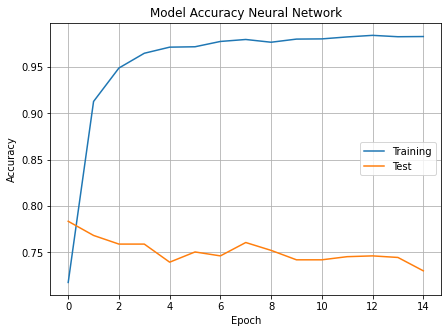

In [66]:
# Plot the accuracy for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

ax.set_title('Model Accuracy Neural Network')
ax.set_xlabel('Epoch')
#plt.xticks(np.arange(0, 1.1, step = 0.1), rotation = 'vertical')
ax.set_ylabel('Accuracy')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()
#ax.figure.savefig(RESULTS_PATH + 'accuracy_normalized.png')
ax.figure.savefig(RESULTS_PATH + 'accuracy_standarized.png')

In [76]:
y_pred = model_f.predict(X_test)
confusion_matrix = confusion_matrix(y_test, np.rint(y_pred))

In [77]:
confusion_matrix

array([[618, 256],
       [433, 194]])

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_f, X_test, y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [74]:
np.rint(y_pred)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

array([[1.1638259e-05],
       [2.5828562e-05],
       [1.6795436e-01],
       ...,
       [1.8613995e-05],
       [6.5175325e-02],
       [7.8088160e-05]], dtype=float32)

In [81]:
print(classification_report(y_test,np.rint(y_pred)))

              precision    recall  f1-score   support

           0       0.59      0.71      0.64       874
           1       0.43      0.31      0.36       627

    accuracy                           0.54      1501
   macro avg       0.51      0.51      0.50      1501
weighted avg       0.52      0.54      0.52      1501

